## Дипломный проект на курсе Data Science школа SkillFactory
# «Модель прогнозирования стоимости жилья для агентства недвижимости»

**Цель:** разработать модель, которая позволила бы агентству недвижимости обойти конкурентов по скорости и качеству совершения сделок.

**Поставленные задачи:**
1. Провести разведывательный анализ и очистку исходных данных. Обратите внимание, что данные в таблице реальные: в результате во многих признаках присутствуют дублирующиеся категории, ошибки ввода, жаргонные сокращения и т .д. Вам предстоит отыскать закономерности, самостоятельно расшифровать все сокращения, найти синонимы в данных, обработать пропуски и удалить выбросы. 
2. Выделить наиболее значимые факторы, влияющие на стоимость недвижимости.
3. Построить модель для прогнозирования стоимости недвижимости.
4. Разработать небольшой веб-сервис, на вход которому поступают данные о некоторой выставленной на продажу недвижимости, а сервис прогнозирует его стоимость.

**Описание данных:**<br>
<br>
➔ 'status' — статус продажи;<br>
➔ 'private pool' и 'PrivatePool' — наличие собственного бассейна;<br>
➔ 'propertyType' — тип объекта недвижимости;<br>
➔ 'street' — адрес объекта;<br>
➔ 'baths' — количество ванных комнат;<br>
➔ 'homeFacts' — сведения о строительстве объекта (содержит несколько
типов сведений, влияющих на оценку объекта);<br>
➔ 'fireplace' — наличие камина;<br>
➔ 'city' — город;<br>
➔ 'schools' — сведения о школах в районе;<br>
➔ 'sqft' — площадь в футах;<br>
➔ 'zipcode' — почтовый индекс;<br>
➔ 'beds' — количество спален;<br>
➔ 'state' — штат;<br>
➔ 'stories' — количество этажей;<br>
➔ 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система
мультилистинга);<br><br>

➔ **'target'** — цена объекта недвижимости (целевой признак, который
необходимо спрогнозировать).

In [142]:
import numpy as np 
import pandas as pd

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import os

# для графиков
import seaborn as sns
import plotly.subplots as spimport
import matplotlib.pyplot as plt

# для нормализации
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from catboost import CatBoostRegressor
from category_encoders import TargetEncoder, CatBoostEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline

In [130]:
# зафиусируем RANDOM_SEED
RANDOM_SEED = 42

In [131]:
# зафиксируем версию пакетов
!pip freeze > requirements.txt

## 4. Моделирование и оценка модели

In [132]:
df = pd.read_csv('data/cleaned_data_for_model.csv')
df.head()

,sqft,target,private_pool_final,beds_final,schools_rating,school_distance_min,Remodeled year_final,Heating_final,status_Active,status_Auction,...,propertyType_multi family,propertyType_other,propertyType_ranch,propertyType_single family,propertyType_townhouse,propertyType_unknown,state_label,year_label,city_label,zipcode_label
0,7.972466,12.943237,False,1.386295,1.648659e+00,9.932521e-01,False,True,1,0,...,0,0,0,1,0,0,20,208,1384,820
1,7.574045,12.644328,False,1.098613,1.386295e+00,9.951321e-03,False,False,0,0,...,0,0,0,1,0,0,34,208,1393,3963
2,6.799056,12.250090,False,0.693148,9.999995e-07,9.999995e-07,False,True,0,0,...,0,0,0,0,1,0,27,109,1120,514
3,7.317876,12.109011,False,-13.815511,8.472983e-01,-2.231423e-01,True,True,1,0,...,0,1,0,0,0,0,6,195,1080,1370
4,7.565275,12.650742,False,1.098613,1.098613e+00,-5.108240e-01,False,True,0,0,...,0,0,0,1,0,0,30,208,662,2487


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283644 entries, 0 to 283643
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sqft                        283644 non-null  float64
 1   target                      283644 non-null  float64
 2   private_pool_final          283644 non-null  bool   
 3   beds_final                  283644 non-null  float64
 4   schools_rating              283644 non-null  float64
 5   school_distance_min         283644 non-null  float64
 6   Remodeled year_final        283644 non-null  bool   
 7   Heating_final               283644 non-null  bool   
 8   status_Active               283644 non-null  int64  
 9   status_Auction              283644 non-null  int64  
 10  status_Back on market       283644 non-null  int64  
 11  status_Closed               283644 non-null  int64  
 12  status_Coming soon          283644 non-null  int64  
 13  status_Conting

### 4.1 Разделение данных

In [135]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=RANDOM_SEED)

### 4.2 Линейная регрессия LinearRegression

In [136]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)

# вычисляем коэффициенты регрессии
model.fit(X_train, y_train)

# делаем предсказания с помощью модели
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# вычисляем требуемые метрики
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 0.46
Test MSE: 0.45
Train MAE: 0.49
Test MAE: 0.48
Train R2: 0.37
Test R2: 0.37


Во-первых, значения на тренировочных и тестовых выборках не сильно отличаются, значит модель не переобучена, что хорошо.<br>
Во-вторых, сами значения не очень удовлетворительны, MSE и MAE чем меньше, тем лучше. У нас получилось, что среднеквадратическая ошибка (Mean Squared Error, далее MSE) 0,45 достаточно высокое значение на тестовой выборке. И средняя абсолютная ошибка (Mean Absolute Error, далее MAE) 0,48 на тестовой выборке.<br>
В то же время коэффициент детерминации (далее R2) чем выше, тем лучше, стоящие показатели модели должны быть больше 0,5. На самой простой модели линейной регрессии у нас R2 равно 0.37 на тестовой выборке. Это значит модель смогла уловить 37% информации о дисперсии.<br>
Из всего этого можно сделать вывод, что есть куда развивать модель, пробовать подбор параметров, ансамблиевые модели.

### 4.3.1 Регуляризация Ridge (L2)

Так как ,судя по метрикам, у нас нет переобучения, мы можем использовать регуляризацию для лучшения обобщающей способности модели. Данных у нас достаточно, и мы избавились от выбросов. Попробуем улучшит ли ситуацию Ridge регуляризация.

In [139]:
# создем объект Ridge регрессии
ridge = Ridge(alpha = 10)
 
ridge.fit(X_train, y_train)
 
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# вычисляем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 0.46
Test MSE: 0.45
Train MAE: 0.49
Test MAE: 0.48
Train R2: 0.37
Test R2: 0.37


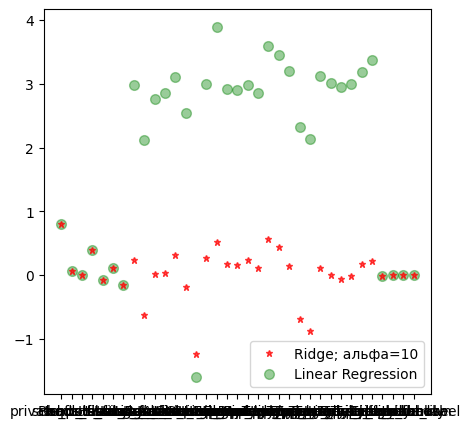

In [140]:
# построим графики весов двух моделей LinearRegression и Ridge
features = X.columns
 
plt.figure(figsize = (5, 5))
plt.plot(features, ridge.coef_, alpha=0.7, linestyle='none' , marker='*', markersize=5, color='red', label=r'Ridge; альфа=10', zorder = 7)
plt.plot(features, model.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green',label='Linear Regression')
plt.xticks(rotation = 0)
plt.legend()
plt.show()

По метрике видно, что регуляризация нам не помогла в улучшении предсказаний. Хотя веса более сбалансированы. Попробуем другой способ регуляризации ElasticNetCV. Elastic Net использует как L1, так и L2 регуляризацию и координатный спуск для минимизации функции потерь.

### 4.3.2 ElacticNetCV

In [147]:
# создаем и тренируем модель ElasticNetCV с кросс-валидацией по 5 фолдам
elastic = ElasticNetCV(cv=5, random_state=RANDOM_SEED)
elastic.fit(X_train, y_train)

# предсказания для обучающей и тестовой выборок
y_train_pred = elastic.predict(X_train)
y_test_pred = elastic.predict(X_test)

# вычисляем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 0.59
Test MSE: 0.57
Train MAE: 0.55
Test MAE: 0.54
Train R2: 0.20
Test R2: 0.20


Метрики ухудшились, хотя переобучения при сравнении трейна и тестовой выборки нет. Думаю стоит попробовать сложную ансамблевую модель бэггинга.

### 4.4.1 RandomForestRegressor

In [114]:
# создаем экземпляр модели RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=RANDOM_SEED)

# обучаем модель на обучающих данных
rf_regressor.fit(X_train, y_train)

# средсказания на обучающих и тестовых данных
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# вычисляем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 0.01
Test MSE: 0.09
Train MAE: 0.07
Test MAE: 0.18
Train R2: 0.98
Test R2: 0.87


Метрики значительно улучшились, хотя наблюдается небольшое переобучение. Ошибки MSE и MAE достаточно низкие, чтоб утверждать, что модель работает хорошо. Так же модель смогла уловить примерно 90% информации о дисперсии.(98% на трейне и 87% на тестовых выборках). На данный момент это лучшая модель.<br>
Попробум поддобрать гиперпараметры для нашей лучше модели, для ее оптимизации. Будем делать это с помощью RandomizedSearchCV.

### 4.4.2 RandomizedSearchCV

In [115]:
# зададим сетку параметров
param_distributions = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
#  определяем гиперпараметры           
random_search_forest = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search_forest.fit(X_train, y_train) 
y_train_pred = random_search_forest.predict(X_train)
y_test_pred = random_search_forest.predict(X_test)

CPU times: total: 12min 56s
Wall time: 3h 25min 41s


In [117]:
# вычисляем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 0.05
Test MSE: 0.10
Train MAE: 0.14
Test MAE: 0.20
Train R2: 0.93
Test R2: 0.86


Подбор оптимальных гиперпараметров позволил оставить ошибки примерно такими же низкими, как в Случайном лесе, а R2 достаточно высоким. При этом разница между трейном и тестовыми выборками меньше, а значит модель более устойчива, менее переобучена. Считаю, что в нашем случае это лучшая модель, не смотря на то, что коэффициент детерминации немного ниже (на трейне был 0,98 - стал 0,93, на тестовой выборке был в модели случайного леса 0,87 - стал 0,86).<br>
Попробуем еще одну модель CatBoostRegr.

### 4.5 CatBoostRegressor

CatBoostRegressor работает с необработанными категориальными данными. Поэтому в предыдущем коде я сохранила данные в файл без кодирования категориальных признаков, с этим файлом и будем работать в данном разделе.

In [151]:
# чтение данных без кодирования категориальных прихнаков
df = pd.read_csv('data/cleaned_data_for_CatBoost.csv')
df.head()

,status,propertyType,street,city,sqft,zipcode,state,target,private_pool_final,beds_final,schools_rating,school_distance_min,Year built,Remodeled year_final,Heating_final
0,Active,single family,240 Heather Ln,Southern Pines,7.972466,28387,NC,12.943237,False,1.386295,1.648659e+00,9.932521e-01,2019,False,True
1,For sale,single family,12911 E Heroy Ave,Spokane Valley,7.574045,99216,WA,12.644328,False,1.098613,1.386295e+00,9.951321e-03,2019,False,False
2,For sale,townhouse,1624 S Newkirk St,Philadelphia,6.799056,19145,PA,12.250090,False,0.693148,9.999995e-07,9.999995e-07,1920,False,True
3,Active,other,552 Casanova Ct,POINCIANA,7.317876,34759,FL,12.109011,False,-13.815511,8.472983e-01,-2.231423e-01,2006,True,True
4,unknown,single family,8612 Cedar Plains Ln,Houston,7.565275,77080,TX,12.650742,False,1.098613,1.098613e+00,-5.108240e-01,2019,False,True


In [152]:
# разделение данных
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=RANDOM_SEED)

In [126]:
# определеяем еще раз категориальные признаки
#cat_features = ['status', 'propertyType', 'street', 'zipcode', 'state', 'city', 'Year built']
#param_grid = {
#    'iterations': [100, 300, 500],
#    'learning_rate': [0.01, 0.03, 0.1],
#    'depth': [4, 6, 8],
#    'l2_leaf_reg': [1, 3, 5],
#}
#cb_model = CatBoostRegressor(random_seed=RANDOM_SEED, silent=True)
#grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
#grid_search.fit(X_train, y_train, cat_features=cat_features)
#best_params = grid_search.best_params_
#best_cb_model = CatBoostRegressor(iterations=best_params['iterations'], learning_rate=best_params['learning_rate'], depth=best_params['depth'], l2_leaf_reg=best_params['l2_leaf_reg'], random_seed=RANDOM_SEED, silent=True)
#best_cb_model.fit(X_train, y_train, cat_features=cat_features)

#y_train_pred = best_cb_model.predict(X_train)
#y_test_pred = best_cb_model.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [127]:
# вычисляем метрики
#mse_train = mean_squared_error(y_train, y_train_pred)
#mse_test = mean_squared_error(y_test, y_test_pred)
#mae_train = mean_absolute_error(y_train, y_train_pred)
#mae_test = mean_absolute_error(y_test, y_test_pred) 
#r2_train = r2_score(y_train, y_train_pred)
#r2_test = r2_score(y_test, y_test_pred)

# выводим метрики
#print(f"Train MSE: {mse_train:.2f}")
#print(f"Test MSE: {mse_test:.2f}")
#print(f"Train MAE: {mae_train:.2f}")
#print(f"Test MAE: {mae_test:.2f}") 
#print(f"Train R2: {r2_train:.2f}")
#print(f"Test R2: {r2_test:.2f}")

Train MSE: 0.08
Test MSE: 0.10
Train MAE: 0.20
Test MAE: 0.21
Train R2: 0.89
Test R2: 0.86


Модель CatBoostRegressor крутится у меня на ноутбуке больше суток, поэтому закомментировала. Но результаты рассчитанных метрик предоставлены выше.

Алгоритм градиентного бустинга для задачи регрессии CatBoostRegressor работает так же хорошо, как RandomizedSearchCV. На тестовой и трейновой выборках нет переобучения. Метрики MSE и MAE (0,10 и 0,21 соответственно) на тестовой выборке, а R2 0,86 на тестовой выборке.

## *Выводы 4 части работы:*

In [153]:
# построим таблицу с обобщенными данными
metrics = {'Metric': ['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R2', 'Test R2'],
           'LinearRegression': [0.46, 0.45, 0.49, 0.48, 0.37, 0.37],
           'Ridge':[0.46, 0.45, 0.49, 0.48, 0.37, 0.37],
           'ElasticNetCV': [0.59, 0.58, 0.55, 0.54, 0.19, 0.19],
           'RandomForestRegressor': [0.01, 0.09, 0.07, 0.18, 0.98, 0.87],
           'RandomizedSearchCV': [0.05, 0.10, 0.14, 0.20, 0.93, 0.86],
           'CatBoostRegressor':[0.08, 0.10, 0.20, 0.21, 0.89, 0.86]
}

metric_com = pd.DataFrame(metrics)
metric_com

,Metric,LinearRegression,Ridge,ElasticNetCV,RandomForestRegressor,RandomizedSearchCV,CatBoostRegressor
0,Train MSE,0.46,0.46,0.59,0.01,0.05,0.08
1,Test MSE,0.45,0.45,0.58,0.09,0.10,0.10
2,Train MAE,0.49,0.49,0.55,0.07,0.14,0.20
3,Test MAE,0.48,0.48,0.54,0.18,0.20,0.21
4,Train R2,0.37,0.37,0.19,0.98,0.93,0.89
5,Test R2,0.37,0.37,0.19,0.87,0.86,0.86


*Итоговый вывод:*

Анализируя общую таблицу, можно сказать, что наилучшие модели RandomizedSearchCV и CatBoostRegressor. Показатели ошибок MSE и MAE наименьшие у этих моделей, коэффициент детерминации R2 наибольший для трейновой и тестовой выборок. При этом разница между выборками у этих моделей минимальная, что указывает на отсутствие переобучения у моделей.